<IPython.core.display.Javascript object>


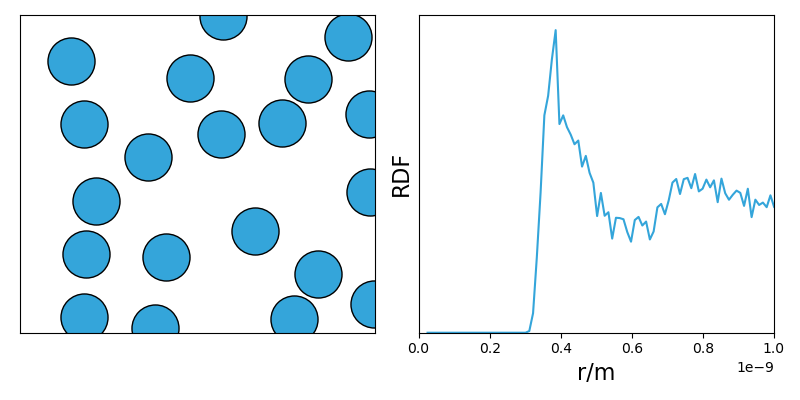

C:\Program Files\Python39\lib\site-packages\pylj-1.4.0-py3.9.egg\pylj\util.py:168: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "integrate" failed type inference due to: non-precise type pyobject
During: typing of argument at C:\Program Files\Python39\lib\site-packages\pylj-1.4.0-py3.9.egg\pylj\util.py (176)

File "C:\Program Files\Python39\lib\site-packages\pylj-1.4.0-py3.9.egg\pylj\util.py", line 176:
    def integrate(self, method):
        <source elided>
        """
        self.particles, self.distances, self.forces, self.energies = method(
        ^

  @jit(nopython=False)
C:\Program Files\Python39\lib\site-packages\numba\core\object_mode_passes.py:177: NumbaWarning: Function "integrate" was compiled in object mode without forceobj=True.

File "C:\Program Files\Python39\lib\site-packages\pylj-1.4.0-py3.9.egg\pylj\util.py", line 169:
    @jit(nopython=False)
    def integrate(self, method):
    ^

  warnings.warn(errors.Numba

C:\Program Files\Python39\lib\site-packages\numba\core\object_mode_passes.py:187: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit

File "C:\Program Files\Python39\lib\site-packages\pylj-1.4.0-py3.9.egg\pylj\pairwise.py", line 317:
def dist(xposition, yposition, box_length):
    <source elided>
    k = 0
    for i in range(0, xposition.size - 1):
    ^

  warnings.warn(errors.NumbaDeprecationWarning(msg,
C:\Program Files\Python39\lib\site-packages\numba\core\ir_utils.py:2031: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'constants' of function 'lennard_jones'.

For more information visit https://numba.pydata.org/numba-doc/latest/ref

In [1]:
from pylj import md, sample

def md_simulation(number_of_particles, temperature, 
                  box_length, number_of_steps, 
                  sample_frequency):
    """
    Runs a molecular dynamics simulation in using the pylj 
    molecular dynamics engine.
    
    Parameters
    ----------
    number_of_particles: int
        The number of particles in the simulation
    temperature: float
        The temperature for the initialisation and 
        thermostating
    box_length: float
        The length of the simulation square
    number_of_steps: int
        The number of molecular dynamics steps to run
    sample_frequency: 
        How regularly the visualisation should be updated
        
    Returns
    -------
    pylj.util.System
        The complete system information from pylj
    """
    %matplotlib notebook
    system = md.initialise(number_of_particles, temperature, 
                           box_length, 'square')
    sample_system = sample.RDF(system)
    system.time = 0
    for i in range(0, number_of_steps):
        system.integrate(md.velocity_verlet)
        system.md_sample()
        system.heat_bath(temperature)
        system.time += system.timestep_length
        system.step += 1
        if system.step % sample_frequency == 0:
            sample_system.update(system)
    sample_system.average()
    return system

system = md_simulation(20, 300, 20, 2000, 25)